## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
# Preprocessing
from sklearn.preprocessing import normalize
# from scipy import stats
# from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)

Reading the data file

In [4]:
data = pd.read_csv('Reduced Features for TAI project.csv')

## Prepocessing

1. Handling non-numerical data

In [6]:
def handle_non_numerical_data(df):
    columns = df.columns.values    
    for column in columns:        
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
                
            df[column] = list(map(convert_to_int, df[column]))

    return df

In [7]:
data = handle_non_numerical_data(data)

2. Normalization

In [10]:
# Normalization function
def normalize(dataset,factor):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*factor
    dataNorm["Patient ID"]=dataset["Patient ID"]
    dataNorm["Label"]=dataset["Label"]
    return dataNorm

In [11]:
df=normalize(data,10)
df.sample(5)

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
1530,37,8.614505,3.467518,4.815966,1.836473,4.115090,2.567261,5.034551,5.972360,1.369738,...,0.001789,0.743291,0.649347,0.522722,0.444448,1.128583,5.248302,0.419048,0.407226,0
1446,36,4.137043,3.371770,4.658062,0.410180,1.481862,0.507509,1.409776,2.659655,0.424574,...,0.008832,0.674793,0.684059,0.193738,0.393887,2.338383,4.280512,0.408949,0.416047,0
2063,48,3.777235,0.000000,2.738887,0.005733,0.023666,0.023557,0.010378,0.010857,0.054506,...,0.001418,0.249832,0.107545,3.198301,0.014819,0.655602,4.358979,0.011009,0.121161,1
2729,64,5.314604,2.683567,3.926450,2.252262,2.404607,3.930507,5.617070,3.692102,0.778213,...,0.001439,0.693267,0.826125,0.613691,0.451257,1.464883,5.647230,0.420205,0.497129,1
3515,94,5.965793,3.396947,4.891198,2.595757,3.839256,3.467079,5.834921,4.912224,1.351407,...,0.000331,0.168070,1.414356,0.211603,0.270177,1.148280,4.659156,0.260681,0.267140,1


In [8]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 3562
Total number of columns in dataset = 152


3. Feature selection (finding top 10 features)

In [12]:
# Split df into x and Y
target_col = "Label"
PatientID = "Patient ID"
X1 = df.loc[:, df.columns != target_col]
X = X1.loc[:, X1.columns != PatientID]
y = df.loc[:, target_col]

In [14]:
X

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
0,6.479351,3.473861,4.834270,2.463927,5.238752,5.728557,5.621938,6.948921,2.087693,2.131375,...,0.377072,0.404266,1.208648,0.770495,2.489307,0.682521,2.579653,9.141846,0.674924,2.077127
1,7.407191,2.570302,3.944542,1.049092,4.110765,2.225202,3.640819,6.747608,1.272870,1.023786,...,0.274305,0.003233,0.770751,0.697080,0.113254,0.542803,1.050606,4.957628,0.487111,0.276320
2,6.043217,3.194086,3.785883,2.377490,5.501240,5.502910,5.298567,4.670883,2.671649,2.081448,...,0.467658,6.362178,1.325664,0.891652,2.970368,0.628542,2.746691,9.630866,0.630554,2.376934
3,3.638798,3.615859,4.748986,0.719736,2.422070,2.111634,2.915646,3.482652,0.593703,0.916432,...,0.204224,0.014900,0.936762,0.819095,0.256704,0.538871,1.549812,5.277412,0.519805,0.295440
4,8.132339,3.469416,4.844387,0.423684,2.133757,1.549489,1.845218,3.563128,0.526682,0.527396,...,0.187020,0.006646,0.758472,0.365329,0.182531,0.442628,1.002459,5.031555,0.392379,0.317892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,1.935907,3.877514,5.154800,0.145545,0.174363,0.096075,0.249408,0.232030,0.115269,0.260685,...,0.089309,0.002233,0.310022,0.508759,0.269264,0.220465,1.959077,5.982213,0.437107,0.359204
3558,4.836694,3.063546,4.523165,1.565478,3.834227,4.273133,4.254446,6.285235,1.429236,1.437653,...,0.437531,0.045435,1.189494,0.938195,5.877056,0.539803,2.279149,9.587698,0.526531,4.243092
3559,4.325561,4.146409,5.533056,2.037181,5.128260,2.204661,5.606251,6.001262,1.745334,2.337833,...,0.248094,0.033968,0.194020,0.851316,0.308430,0.382383,2.723836,4.446931,0.349980,0.174222
3560,6.088173,2.719660,3.689197,0.530131,1.425710,0.431391,1.656793,1.629459,0.481672,0.742365,...,0.124900,0.001452,0.252688,0.412022,0.781548,0.256162,1.447812,4.428655,0.324203,0.179408


In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3557    1
3558    1
3559    1
3560    1
3561    1
Name: Label, Length: 3562, dtype: int64

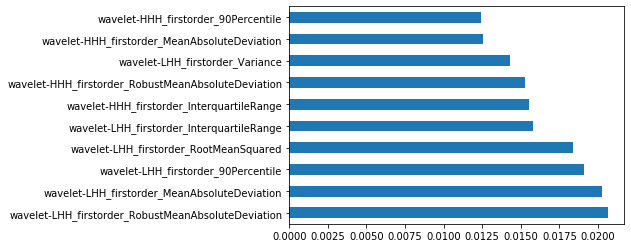

In [8]:
# feature importance
model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [9]:
# feature importance

cancer = df[['Patient ID','wavelet-LHH_firstorder_MeanAbsoluteDeviation','wavelet-LHH_firstorder_90Percentile','wavelet-LHH_firstorder_RootMeanSquared',
            'wavelet-LHH_firstorder_InterquartileRange','wavelet-HHH_firstorder_MeanAbsoluteDeviation','wavelet-HHH_firstorder_RobustMeanAbsoluteDeviation',
            'wavelet-LHL_glrlm_RunPercentage','wavelet-HHH_firstorder_InterquartileRange','wavelet-HHH_firstorder_90Percentile','wavelet-LHH_firstorder_RobustMeanAbsoluteDeviation','Label']]

In [10]:
cancer.shape

(3562, 12)

## TASK-1

In [10]:
# Dropping Label
X = cancer.drop(['Label'],axis=1)
X.head()

,Patient ID,wavelet-LHH_firstorder_MeanAbsoluteDeviation,wavelet-LHH_firstorder_90Percentile,wavelet-LHH_firstorder_RootMeanSquared,wavelet-LHH_firstorder_InterquartileRange,wavelet-HHH_firstorder_MeanAbsoluteDeviation,wavelet-HHH_firstorder_RobustMeanAbsoluteDeviation,wavelet-LHL_glrlm_RunPercentage,wavelet-HHH_firstorder_InterquartileRange,wavelet-HHH_firstorder_90Percentile,wavelet-LHH_firstorder_RobustMeanAbsoluteDeviation
0,1,1.422998,1.837974,1.340549,1.761078,1.541187,2.064933,2.474385,2.614499,2.111540,1.569157
1,1,0.886390,1.378363,0.834560,1.179789,1.159212,1.791370,3.785755,2.299668,1.862830,0.986049
2,1,1.222356,1.631032,1.170217,1.502426,1.225899,1.512689,2.498698,1.959131,1.723429,1.329458
3,2,0.992312,1.478071,0.924462,1.247003,1.125593,1.695749,3.678430,2.141624,1.940564,1.126034
4,2,0.807966,1.472385,0.780339,1.041210,1.005967,1.660349,4.962824,2.221524,1.741053,0.867195


In [11]:
y = cancer['Label']
type(y)

pandas.core.series.Series

### Splitting the Data in Test and Train

In [12]:
# Splitting in training and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 40)

Removing 'Patient ID' feature

In [13]:
# Seperating Patient ID for later
# Dropping Patient ID 
X_patientID = X_test['Patient ID']
X_train = X_train.drop(['Patient ID'],axis=1)
X_test = X_test.drop(['Patient ID'],axis=1)


In [14]:
print(X_train.shape)
print(y_train.shape)

(2849, 10)
(2849,)


### 1.Random forest

In [17]:
clf_RF = RandomForestClassifier(max_depth=10, random_state=0, max_features=2)

for iter in range(50):
    clf_RF.fit(X_train, y_train)
    y_train_predicted = clf_RF.predict(X_train)
    y_test_predicted = clf_RF.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    clf_RF.n_estimators += 1

Iteration: 0 Train mse: 0.14215514215514216 Test mse: 0.2805049088359046
Iteration: 1 Train mse: 0.14215514215514216 Test mse: 0.2805049088359046
Iteration: 2 Train mse: 0.14110214110214112 Test mse: 0.2791023842917251
Iteration: 3 Train mse: 0.14145314145314145 Test mse: 0.28190743338008417
Iteration: 4 Train mse: 0.14145314145314145 Test mse: 0.2762973352033661
Iteration: 5 Train mse: 0.14075114075114076 Test mse: 0.2791023842917251
Iteration: 6 Train mse: 0.14215514215514216 Test mse: 0.28190743338008417
Iteration: 7 Train mse: 0.14145314145314145 Test mse: 0.2805049088359046
Iteration: 8 Train mse: 0.14215514215514216 Test mse: 0.28330995792426367
Iteration: 9 Train mse: 0.14215514215514216 Test mse: 0.2805049088359046
Iteration: 10 Train mse: 0.14215514215514216 Test mse: 0.28190743338008417
Iteration: 11 Train mse: 0.14215514215514216 Test mse: 0.2791023842917251
Iteration: 12 Train mse: 0.14145314145314145 Test mse: 0.2805049088359046
Iteration: 13 Train mse: 0.14075114075114076

In [18]:
predict = clf_RF.predict(X_test)
print(accuracy_score(y_test,predict))

# grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.726507713884993
[[364  40]
 [155 154]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       404
           1       0.79      0.50      0.61       309

    accuracy                           0.73       713
   macro avg       0.75      0.70      0.70       713
weighted avg       0.74      0.73      0.71       713



Text(0.5, 1, 'Confusion matrix for Random forest')

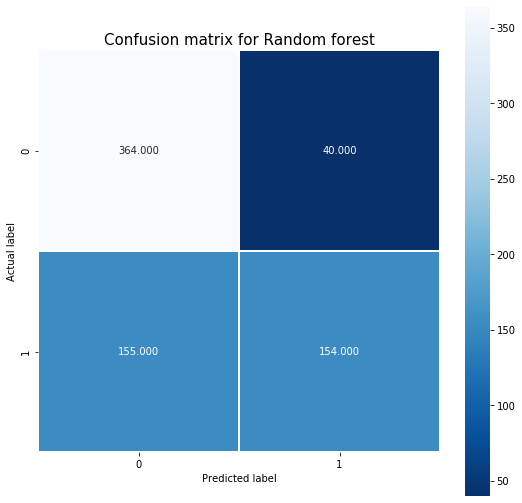

In [19]:
cm = metrics.confusion_matrix(y_test, predict)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion matrix for Random forest'
plt.title(all_sample_title, size = 15)


### 2. SGD

In [18]:
# SGD
clf_SGD = SGDClassifier(loss="log", penalty="l2", max_iter=2)
clf_SGD.fit(X_train, y_train)

predict = clf_SGD.predict(X_test)
print(accuracy_score(y_test,predict))

# grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.6339410939691444
[[404   0]
 [261  48]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       404
           1       1.00      0.16      0.27       309

    accuracy                           0.63       713
   macro avg       0.80      0.58      0.51       713
weighted avg       0.78      0.63      0.54       713



Text(0.5, 1, 'Confusion matrix for SGD')

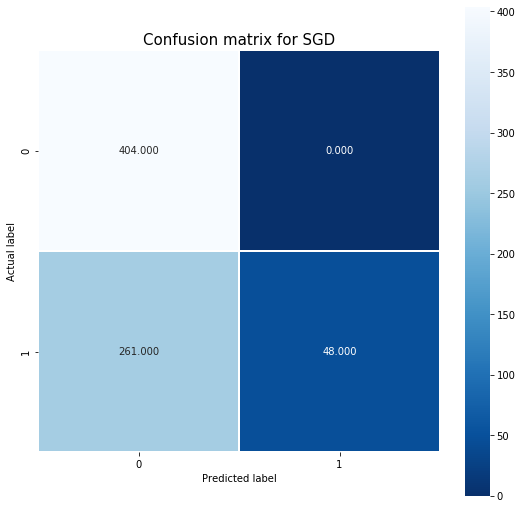

In [19]:
cm = metrics.confusion_matrix(y_test, predict)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion matrix for SGD'
plt.title(all_sample_title, size = 15)

### 3. SVC

In [20]:
# SVC
# Radial Basis Function kernal(rbf)

clf_SVC = SVC(C=1, degree=3, gamma=1, kernel='rbf',verbose=2)
clf_SVC.fit(X_train,y_train)

predict = clf_SVC.predict(X_test)
print(accuracy_score(y_test,predict))

# grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[LibSVM]0.726507713884993
[[375  29]
 [166 143]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       404
           1       0.83      0.46      0.59       309

    accuracy                           0.73       713
   macro avg       0.76      0.70      0.69       713
weighted avg       0.75      0.73      0.71       713



Text(0.5, 1, 'Confusion matrix for SVC')

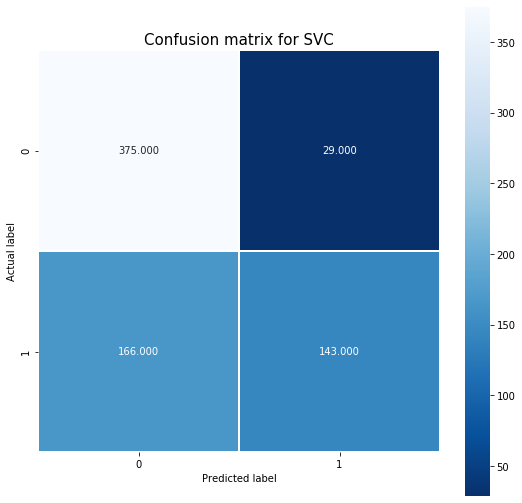

In [21]:
cm = metrics.confusion_matrix(y_test, predict)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion matrix for SVC'
plt.title(all_sample_title, size = 15)

### 2D plot for 2 features

In [22]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [85]:
def plot(clf,txt):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of %s SVC'%(txt))
    # Set-up grid for plotting.
    X0, X1 = Xz['wavelet-LHL_glrlm_RunPercentage'], Xz['wavelet-LHH_firstorder_MeanAbsoluteDeviation']
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('firstorder_MeanAbsoluteDeviation')
    ax.set_xlabel('LHL_glrlm_RunPercentage')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

No handles with labels found to put in legend.


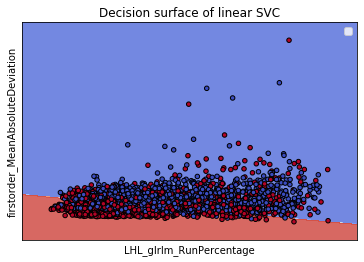

No handles with labels found to put in legend.


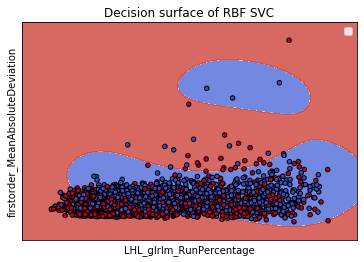

In [90]:
Xz = X_train[['wavelet-LHL_glrlm_RunPercentage','wavelet-LHH_firstorder_MeanAbsoluteDeviation']]

model = svm.SVC(kernel='linear')
model_rbf = svm.SVC(kernel='rbf',degree=3)

clf_2D = model.fit(Xz, y_train)
clf_2D_rbf = model_rbf.fit(Xz, y_train)

plot(clf_2D,'linear')
plot(clf_2D_rbf, 'RBF')

## Parameter Fine-tuning

### 1. Fine tuning for SVC

In [25]:
# Fine tuning for SVC 

# Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid','linear']}

# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.4s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.6s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.4s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.4s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.5s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.5s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.5s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.4s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.5s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.4s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   1.7s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   1.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   1.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   7.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   5.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   7.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   6.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   5.8s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
print(grid.best_estimator_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


### 2. Fine tuning for random forest 

In [27]:
# Fine tuning for random forest
# Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma
param_grid = {'bootstrap': [True], 'max_depth': [2,10,20], 'max_features': [2, 3], 'n_estimators': [100, 200, 300] }

# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,cv = 3, n_jobs = -1, verbose = 2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   19.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [28]:
print(grid.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### 3. Fine tuning for SGD 

In [29]:
# loss="hinge", penalty="l2", max_iter=5

# Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma
param_grid = {'loss': ['hinge','modified_huber','log'], 'penalty': ['l2','l1'], 'max_iter': [2, 5, 10]}

# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SGDClassifier(),param_grid,refit=True, verbose = 2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] loss=hinge, max_iter=2, penalty=l2 ..............................
[CV] ............... loss=hinge, max_iter=2, penalty=l2, total=   0.0s
[CV] loss=hinge, max_iter=2, penalty=l2 ..............................
[CV] ............... loss=hinge, max_iter=2, penalty=l2, total=   0.0s
[CV] loss=hinge, max_iter=2, penalty=l2 ..............................
[CV] ............... loss=hinge, max_iter=2, penalty=l2, total=   0.0s
[CV] loss=hinge, max_iter=2, penalty=l2 ..............................
[CV] ............... loss=hinge, max_iter=2, penalty=l2, total=   0.0s
[CV] loss=hinge, max_iter=2, penalty=l2 ..............................
[CV] ............... loss=hinge, max_iter=2, penalty=l2, total=   0.0s
[CV] loss=hinge, max_iter=2, penalty=l1 ..............................
[CV] ............... loss=hinge, max_iter=2, penalty=l1, total=   0.0s
[CV] loss=hinge, max_iter=2, penalty=l1 ..............................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] loss=hinge, max_iter=5, penalty=l1 ..............................
[CV] ............... loss=hinge, max_iter=5, penalty=l1, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l1 ..............................
[CV] ............... loss=hinge, max_iter=5, penalty=l1, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l1 ..............................
[CV] ............... loss=hinge, max_iter=5, penalty=l1, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] .............. loss=hinge, max_iter=10, penalty=l2, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] .............. loss=hinge, max_iter=10, penalty=l2, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] .............. loss=hinge, max_iter=10, penalty=l2, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] .............. loss=hinge, max_iter=10, penalty=l2, total=   0.0s
[CV] 

[CV] ................ loss=log, max_iter=10, penalty=l2, total=   0.0s
[CV] loss=log, max_iter=10, penalty=l2 ...............................
[CV] ................ loss=log, max_iter=10, penalty=l2, total=   0.0s
[CV] loss=log, max_iter=10, penalty=l2 ...............................
[CV] ................ loss=log, max_iter=10, penalty=l2, total=   0.0s
[CV] loss=log, max_iter=10, penalty=l1 ...............................
[CV] ................ loss=log, max_iter=10, penalty=l1, total=   0.0s
[CV] loss=log, max_iter=10, penalty=l1 ...............................
[CV] ................ loss=log, max_iter=10, penalty=l1, total=   0.0s
[CV] loss=log, max_iter=10, penalty=l1 ...............................
[CV] ................ loss=log, max_iter=10, penalty=l1, total=   0.0s
[CV] loss=log, max_iter=10, penalty=l1 ...............................
[CV] ................ loss=log, max_iter=10, penalty=l1, total=   0.0s
[CV] loss=log, max_iter=10, penalty=l1 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'loss': ['hinge', 'modified_huber', 'log'],
                         'max_iter': [2, 5, 10], 'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [30]:
print(grid.best_estimator_)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=5, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


## TASK-2

Adding Patient ID again

In [31]:
# Add patient IDs back to the test dataset
X_test['Patient ID'] = X_patientID
X_test['Predict'] = predict

"CountLabels" is predicting all the Labels of a given Patient ID and counting zeors and ones. 

"getLabel" is counting the original Labels of a given Patient ID


In [36]:
# Counting 1 and 0
def CountLabels(patientID):
    Zero_RF=Zero_SVC=Zero_SGD=0
    One_RF=One_SVC=One_SGD=0
    rf=svc=sgd=0
    
    fil_ID = X_test['Patient ID']==patientID
    fil_row = X_test[fil_ID]
    row = fil_row.drop(columns=['Patient ID','Predict'],axis=1)      
    
    # Making three predictions for three distinct models
    dataModel_RF  = clf_RF.predict(row)
    dataModel_SVC = clf_SVC.predict(row)
    dataModel_SGD = clf_SGD.predict(row)
        
    Zero_RF = np.count_nonzero(dataModel_RF==0)
    One_RF  = np.count_nonzero(dataModel_RF==1)
    
    Zero_SVC = np.count_nonzero(dataModel_SVC==0)
    One_SVC  = np.count_nonzero(dataModel_SVC==1)

    Zero_SGD = np.count_nonzero(dataModel_SGD ==0)
    One_SGD  = np.count_nonzero(dataModel_SGD==1)      
    
    if One_RF>=Zero_RF:
        rf=1
    
    if One_SVC>=Zero_SVC:
        svc=1
    
    if One_SGD>=Zero_SGD:
        sgd=1

    return(rf,svc,sgd)
    
def getLabel(patientID):        
    fill_ID = data['Patient ID']==patientID
    fill_row = data[fill_ID]
    first_row = fill_row.iloc[0:1]
    ID_label = first_row[['Patient ID','Label']]
    return(int(ID_label['Label']))

1. Taking out the distinct patients and sort them in ascending order.
2. Running a for loop for all the patients and calculating predicted_labels and Original_label
3. Calculating the accuracy_prediction by using right predicitons divided by total patients.

In [37]:
distinct_patients = X_test['Patient ID'].unique()

distinct_patients.sort()
newDataset = []
originalDataset = []
correct_rf = correct_svc = correct_sgd = 0

for i in range(len(distinct_patients)):
    
    predicted_Label = CountLabels(distinct_patients[i])
    original_Label = getLabel(distinct_patients[i])

    if predicted_Label[0] == original_Label:
        correct_rf += 1
        
    if predicted_Label[1] == original_Label:
        correct_svc += 1

    if predicted_Label[2] == original_Label:
        correct_sgd += 1        
    
accuracy_pred_rf = correct_rf/len(distinct_patients)
accuracy_pred_svc = correct_svc/len(distinct_patients)
accuracy_pred_sgd = correct_sgd/len(distinct_patients)

In [80]:
print('Number of correct guesses(out of %i):'%(len(distinct_patients)))
print('Rain forest - %d\nSVC - %d\nSGD - %d'% (correct_rf,correct_svc,correct_sgd))

Number of correct guesses(out of 86):
Rain forest - 62
SVC - 64
SGD - 49


In [79]:
print('Rain forest |  SVC  |   SGD \n-----------------------------')
print('{0:2f}    | {1:5.2f} | {2:7.2f}'.format(accuracy_pred_rf,accuracy_pred_svc,accuracy_pred_sgd))


Rain forest |  SVC  |   SGD 
-----------------------------
0.720930    |  0.74 |    0.57
